<a href="https://colab.research.google.com/github/Rmejiaz/ModeladoSimulacion/blob/main/Cuadernos/Cap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Dynamics and Chaos - Steven H. Strogatz - Capítulo 3

### Rafael Mejía Zuluaga

Simulaciones de los ejercicios del capítulo 3.

- Desarrollo teórico de los ejercicios: https://github.com/Rmejiaz/ModeladoSimulacion/blob/main/Talleres/Cap3.pdf

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from scipy.optimize import root_scalar

In [20]:
def plot_vector_fields(f,critical_values,xi,xf,n,ti,tf):
  b = 0
  x = np.linspace(xi,xf,100)
  plt.figure(figsize=(int(5*len(critical_values)),10))
  p = 1
  for i in critical_values:
    plt.subplot(2,len(critical_values),p)
    p = p+1
    plt.plot(x,f(t=0,x=x,r=i,b=0))
    plt.axhline(0,color='k')
    plt.axvline(0,color='k')
    plt.title(f"$r = {i}$",fontsize=20)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$\dot x$",fontsize = 15)

    tspam=[ti, tf]
    t=np.linspace(ti,tf,100)
    plt.subplot(2,len(critical_values),p+len(critical_values)-1)
    for x0 in np.linspace(xi,xf,n):
      sol=solve_ivp(f,tspam,[x0],args=(i,b),t_eval=t)
      plt.plot(sol.t, sol.y[0])
      plt.ylim(-10,10)
      plt.xlabel("$t$",fontsize=15)
      plt.ylabel("$x(t)$",fontsize=15)
  plt.tight_layout()
    

## 3.1 Saddle-Node Bifurcation

### 3.1.1
#### $\dot x = 1 + rx + x^2$

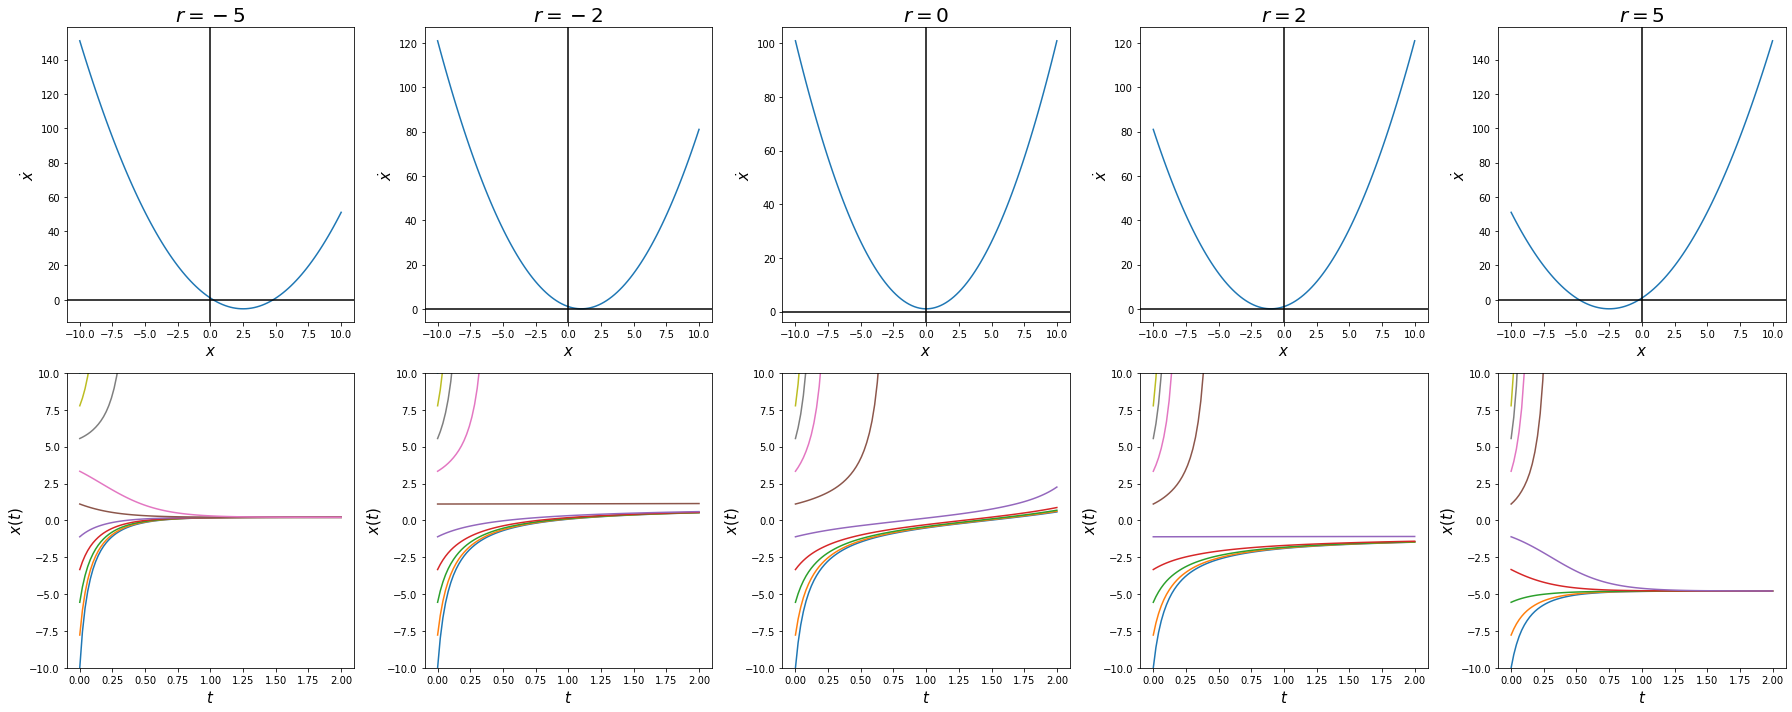

In [21]:
def f(t,x,r,b=0):
  return 1 + r*x + x**2


plot_vector_fields(f,[-5,-2,0,2,5],-10,10,10,0,2)

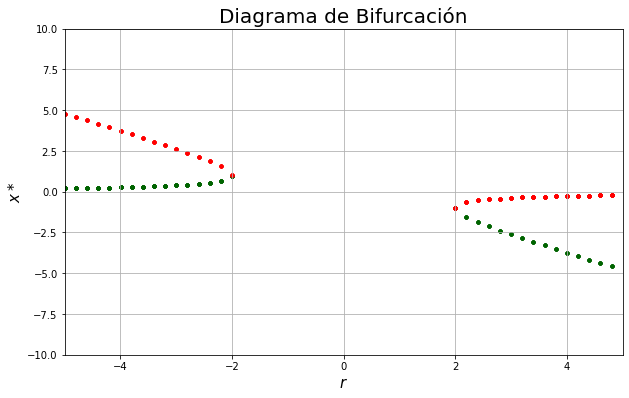

In [22]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()


### 3.1.2

#### $\dot x = r - \cosh x$

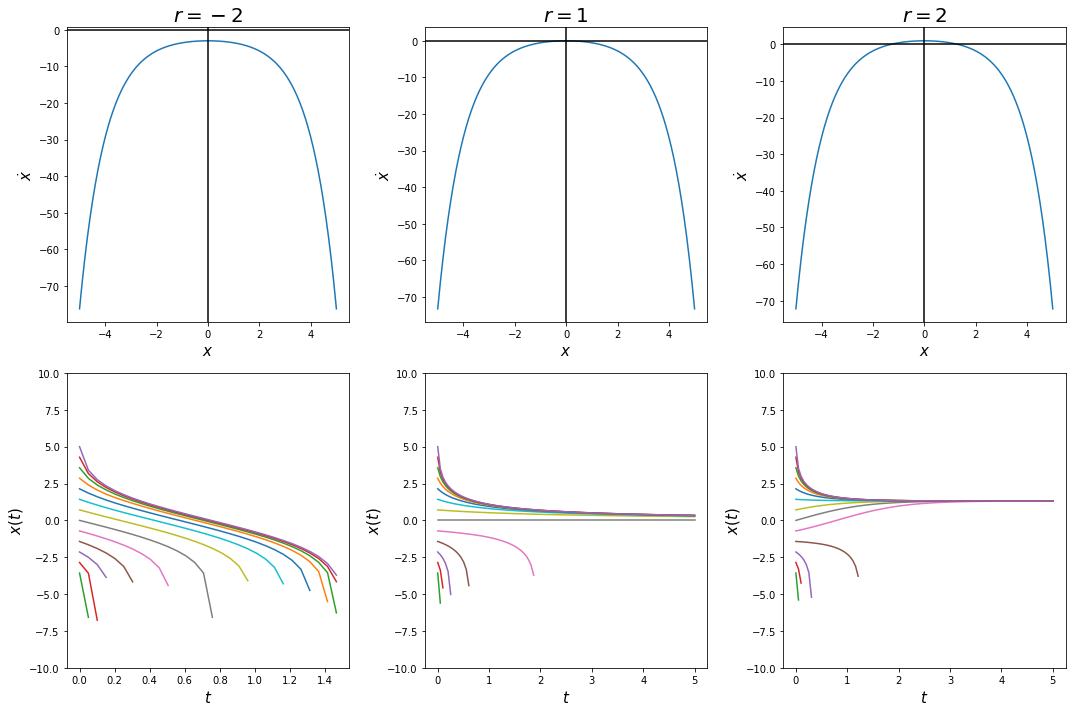

In [23]:
import warnings
warnings.filterwarnings('ignore')

def f2(t,x,r,b=0):
  return r - np.cosh(x)

plot_vector_fields(f2,[-2,1,2],-5,5,15,0,5)

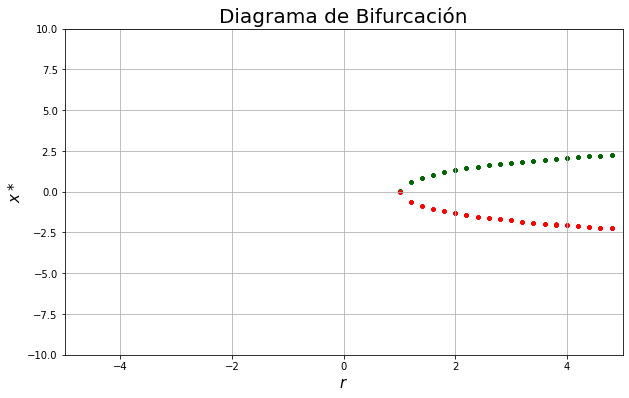

In [24]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)

plt.show()

### 3.1.3

#### $\dot x = r + x - \ln (x+1)$

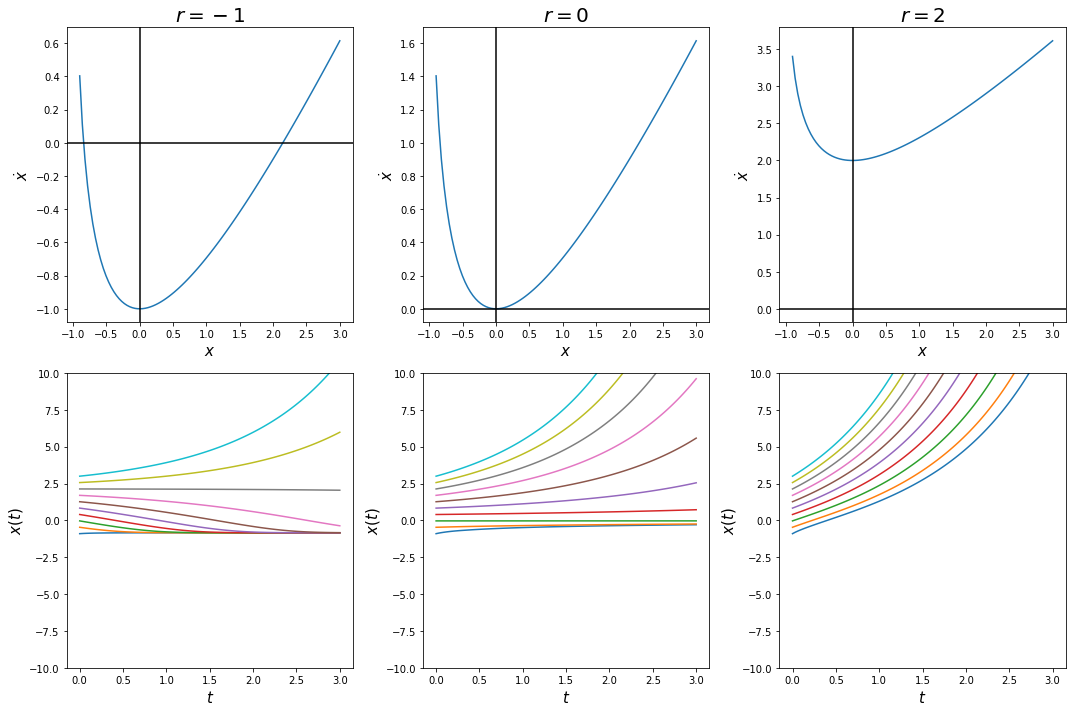

In [25]:
def f3(t,x,r,b=0):
  return r + x - np.log(x+1) 

plot_vector_fields(f3,[-1,0,2],-0.9,3,10,0,3)

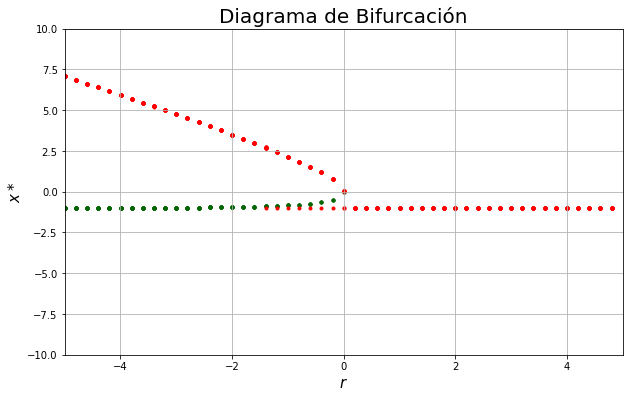

In [26]:
ti=0; tf=50; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solve_ivp(f3,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solve_ivp(f3,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.2 Transcritical Bifurcation

### 3.2.1

#### $rx + x^2$

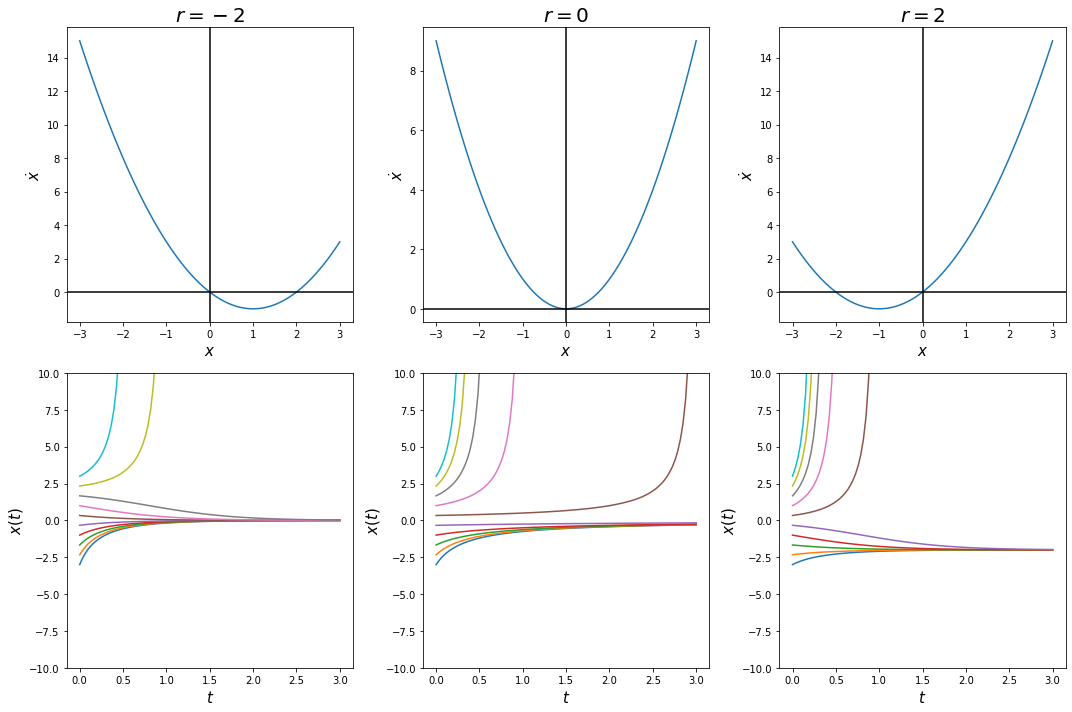

In [27]:
def f4(t,x,r,b=0):
  return r*x + x**2 

plot_vector_fields(f4,[-2,0,2],-3,3,10,0,3)

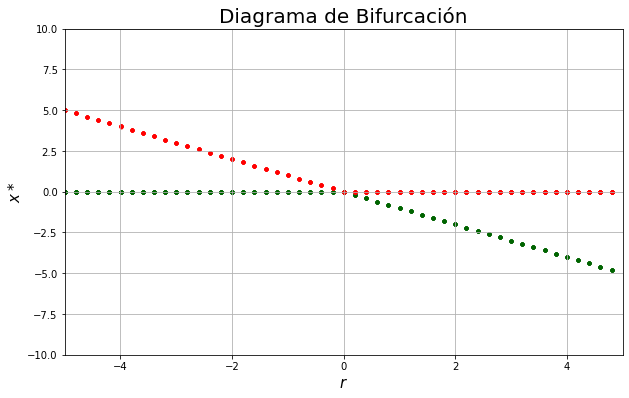

In [28]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

### 3.2.2

#### $\dot x = rx - \ln (x+1)$

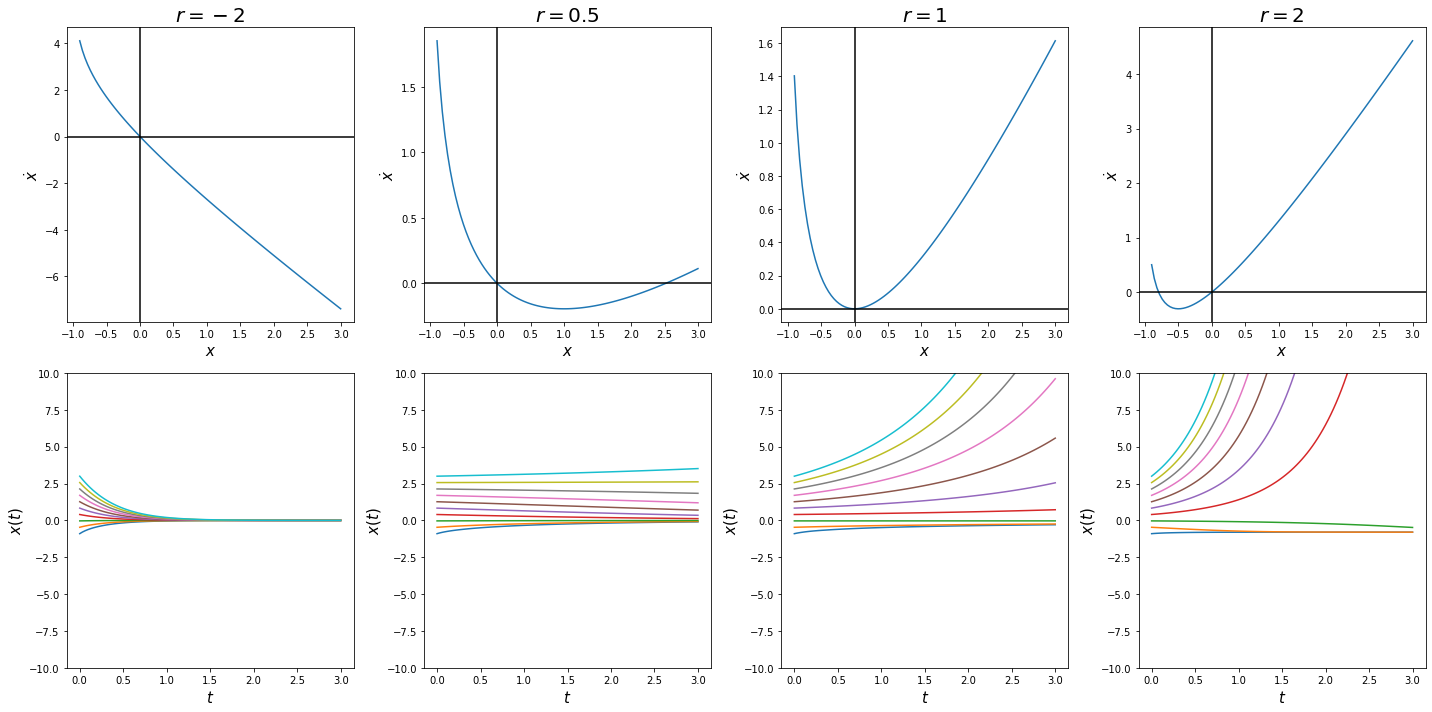

In [38]:
def f5(t,x,r,b=0):
  return r*x - np.log(x+1) 

plot_vector_fields(f5,[-2,0.5,1,2],-0.9,3,10,0,3)

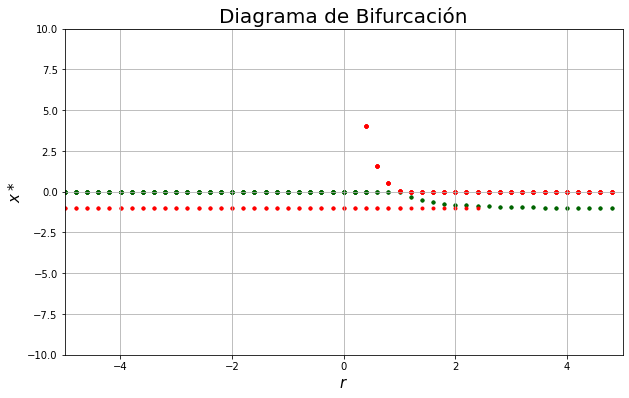

In [39]:
ti=0; tf=50; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solve_ivp(f5,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-0.9,5,0.7):
    sol=solve_ivp(f5,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

### 3.2.3

#### $\dot x = x - rx(1-x)$

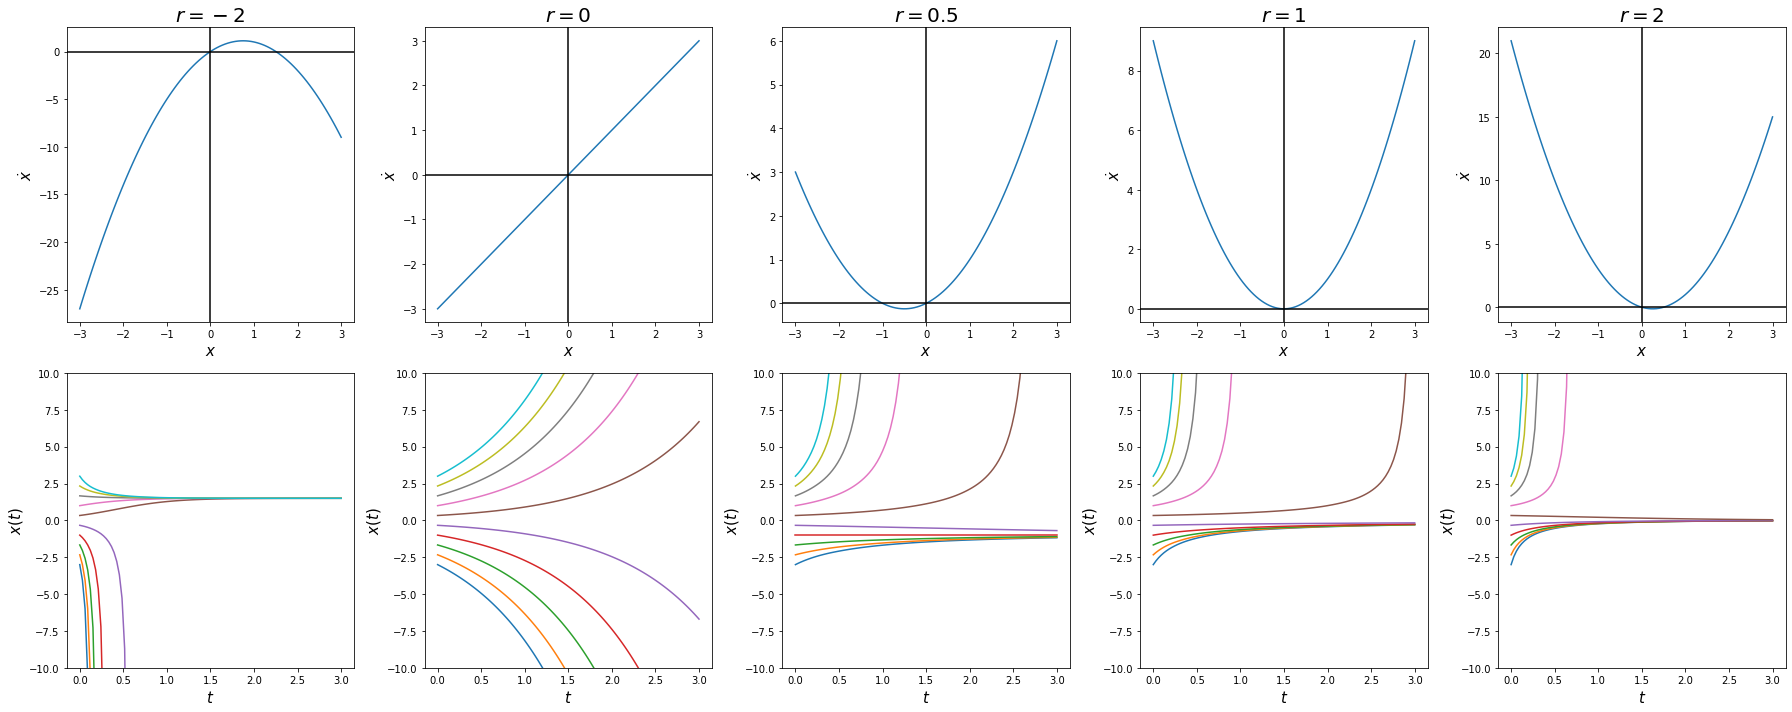

In [41]:
def f6(t,x,r,b=0):
  return x-r*x*(1-x) 

plot_vector_fields(f6,[-2,0,0.5,1,2],-3,3,10,0,3)

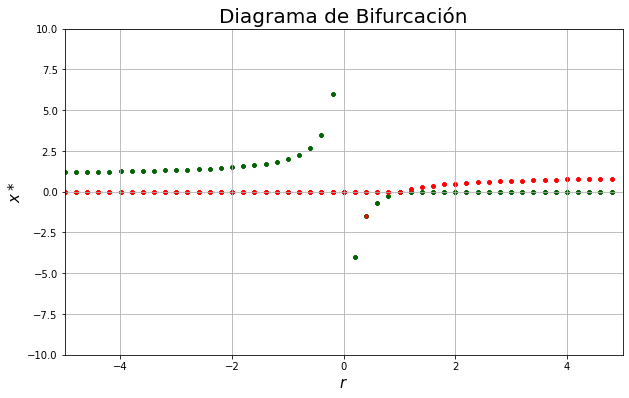

In [42]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.4 Pitchfork Bifurcation

### 3.4.1 

#### $ \dot x = rx + 4x^3$

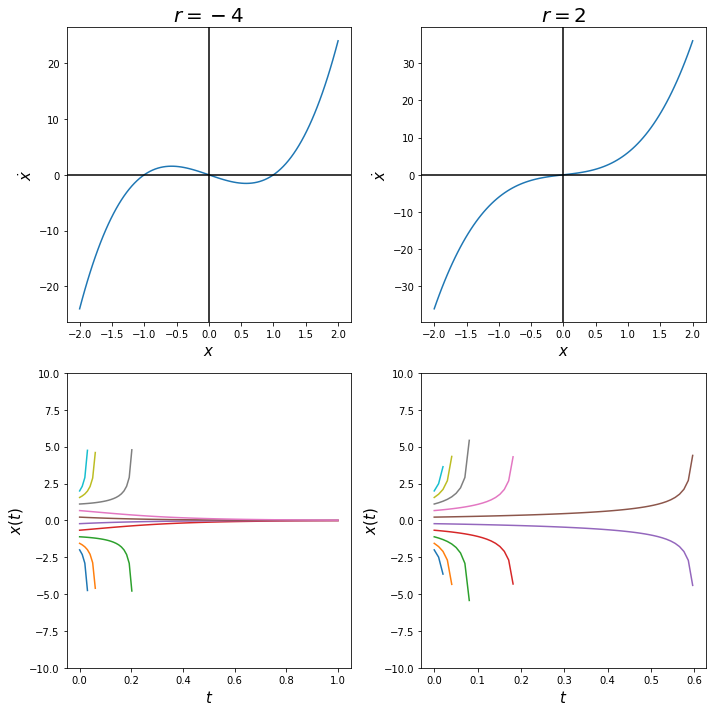

In [49]:
def f7(t,x,r,b=0):
  return r*x + 4*x**3

plot_vector_fields(f7,[-4,2],-2,2,10,0,1)

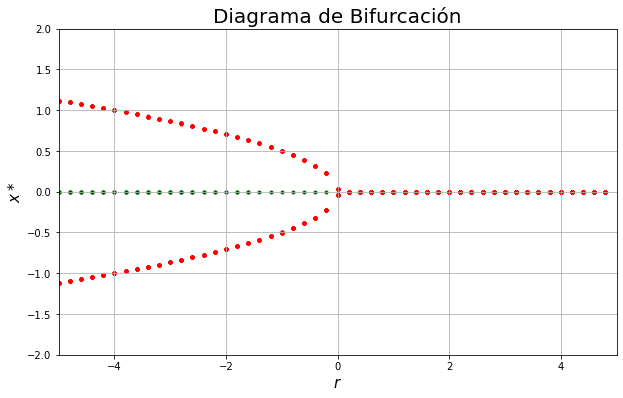

In [52]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -2, 2])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

### 3.4.2 
#### $\dot x = rx - \sinh x$

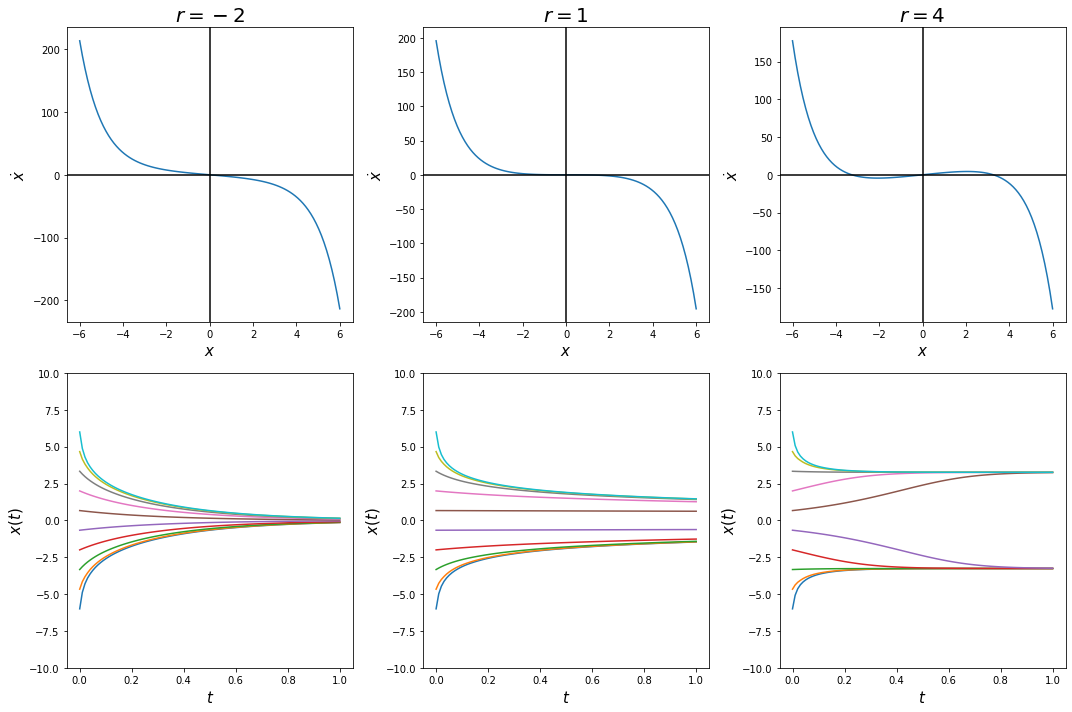

In [56]:
def f8(t,x,r,b=0):
  return r*x - np.sinh(x)

plot_vector_fields(f8,[-2,1,4],-6,6,10,0,1)

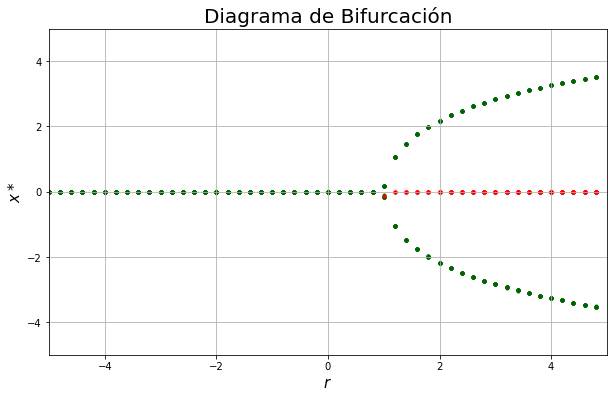

In [55]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f8,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f8,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -5, 5])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

### 3.4.3

#### $\dot x = rx - 4x^3$

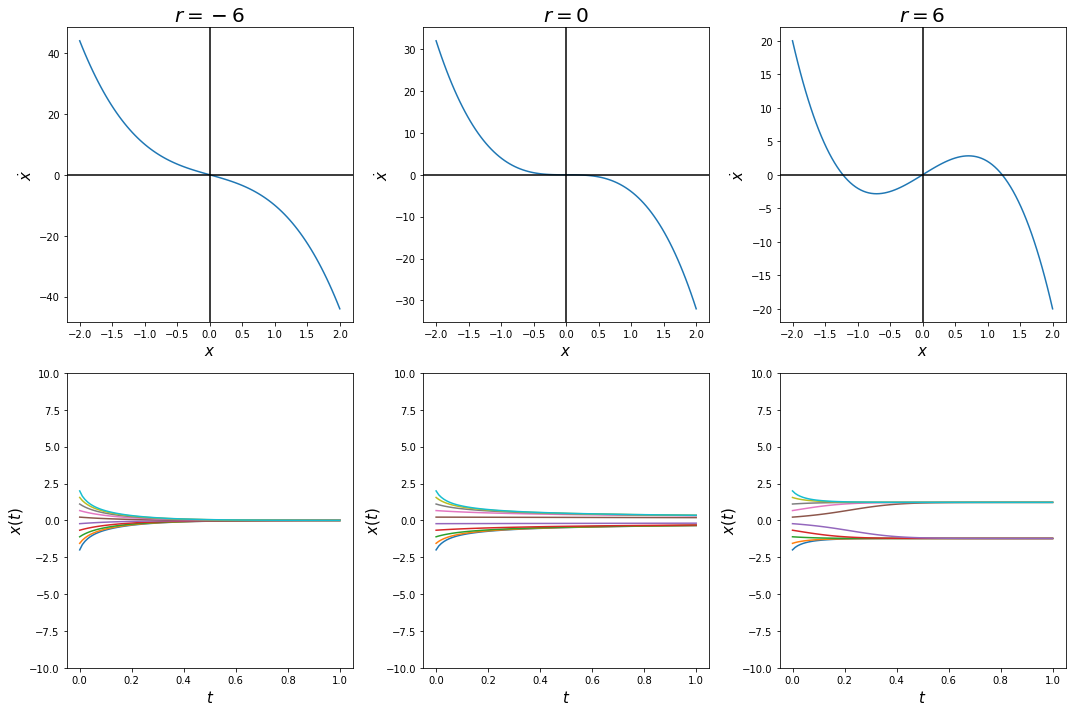

In [62]:
def f9(t,x,r,b=0):
  return r*x - 4*x**3

plot_vector_fields(f9,[-6,0,6],-2,2,10,0,1)

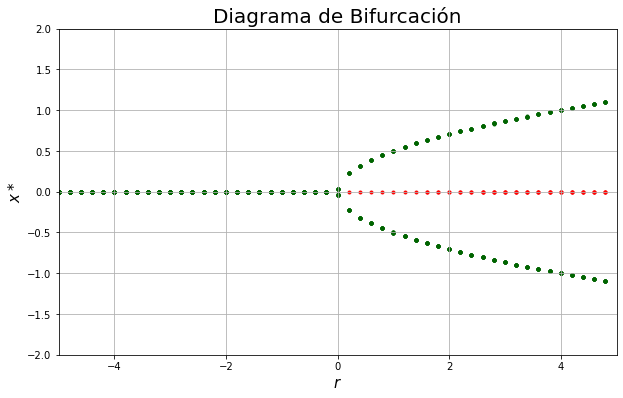

In [64]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f9,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f9,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -2, 2])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()